# Overview: Game Maps

In [1]:
# Pandas
import numpy as np
import pandas as pd
# Plot
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('seaborn-whitegrid')
%matplotlib inline

Read data

In [2]:
dataset_folder = '../input'
plot_folder = '../plot'

courses = pd.read_csv('%s/%s.csv' % (dataset_folder, 'courses'), sep='\t', encoding='utf-8')
players = pd.read_csv('%s/%s.csv' % (dataset_folder, 'players'), sep='\t', encoding='utf-8')

## Overview

In [3]:
courses.head(3)

,id,difficulty,gameStyle,maker,title,thumbnail,image,creation
0,079D-0000-0351-17E2,expert,marioBros3,NolramImpro,Apocalipse 14:12,https://dypqnhofrd2x2.cloudfront.net/079D-0000...,https://dypqnhofrd2x2.cloudfront.net/079D-0000...,2017-08-11 00:00:00
1,07CD-0000-030D-EA60,expert,marioBrosU,igorsssa,Dangerous Ship Fantasy,https://dypqnhofrd2x2.cloudfront.net/07CD-0000...,https://dypqnhofrd2x2.cloudfront.net/07CD-0000...,2017-03-11 00:00:00
2,07F7-0000-030F-A51B,superExpert,marioWorld,Wiggle133,Pow-Ing (Speedrun) (^o^),https://dypqnhofrd2x2.cloudfront.net/07F7-0000...,https://dypqnhofrd2x2.cloudfront.net/07F7-0000...,2017-03-14 00:00:00


### Difficulty

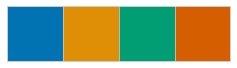

In [4]:
# palette of colors
palette = sns.color_palette('colorblind', 4)
sns.palplot(palette)

[('expert', 27753), ('superExpert', 6233), ('normal', 51354), ('easy', 29692)]


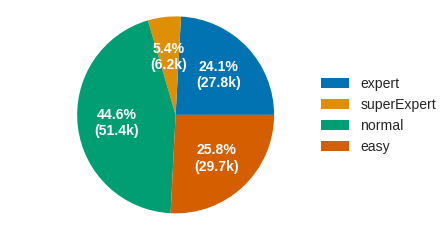

In [5]:
# values
labels = courses['difficulty'].unique().tolist()
values = [sum(courses['difficulty'] == label) for label in labels]
print(list(zip(labels, values)))

# autopct pie plot - function
def func(pct, allvals):
    absolute = float(pct/100.*np.sum(allvals))/1000.0
    return "{:.1f}%\n({:.1f}k)".format(pct, absolute)

# plot
fontsize = 14
fig, ax = plt.subplots()
ax.pie(values, autopct=lambda pct: func(pct, values), colors=palette,
       textprops={'color':'w','fontsize':fontsize,'weight':'bold'})
lgd = ax.legend(labels, loc='center left', bbox_to_anchor=(0.9, 0, 0.5, 1), prop={'size':fontsize})
ax.axis('equal')
plt.savefig('%s/%s.pdf' % (plot_folder, 'difficulty'), dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

### Game Style

[('marioBros3', 9318), ('marioBrosU', 59464), ('marioWorld', 21908), ('marioBros', 24342)]


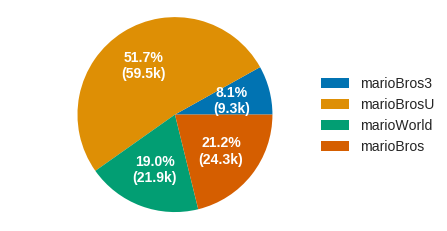

In [6]:
# values
labels = courses['gameStyle'].unique().tolist()
values = [sum(courses['gameStyle'] == label) for label in labels]
print(list(zip(labels, values)))

# plot
fig, ax = plt.subplots()
ax.pie(values, autopct=lambda pct: func(pct, values), colors=palette,
       textprops={'color':'w','fontsize':fontsize,'weight':'bold'})
lgd = ax.legend(labels, loc='center left', bbox_to_anchor=(0.9, 0, 0.5, 1), prop={'size':fontsize})
ax.axis('equal')
plt.savefig('%s/%s.pdf' % (plot_folder, 'gameStyle'), dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

### Makers - Players who develop maps

In [7]:
makers = courses['maker'].value_counts().to_dict()
print('number of makers: %d' % (len(makers)))

number of makers: 48621


Who produce more courses?  
Top-25 makers (by number of courses)  

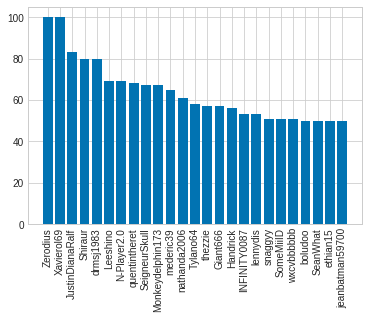

In [8]:
# values
top = 25
labels = list(makers.keys())[0:top]
x_axis = range(len(labels))
y_axis = list(makers.values())[0:top]

# plot
fig, ax = plt.subplots()
plt.bar(x_axis, y_axis, align='center', color=palette[0])
plt.xticks(x_axis, labels, rotation=90)
plt.show()

### Courses by country

In [9]:
players = players.set_index('id')
players.head()

,image,flag,name
id,,,
NolramImpro,http://mii-images.cdn.nintendo.net/3nhht3y6sjm...,BR,Nolram
SGK2017,http://mii-images.cdn.nintendo.net/4bxo1rny12r...,JP,しげ
preamstrikbiz0,http://mii-images.cdn.nintendo.net/2i0nphr806h...,US,primo
gotatari,http://mii-images.cdn.nintendo.net/2dvhs41zz7y...,JP,たくと
skrufpanda,http://mii-images.cdn.nintendo.net/2n2gr4n7oxg...,NO,pinkachuz


In [10]:
# players
df = pd.DataFrame(makers, index=['courses']).transpose()
df = df.rename(columns={'index':'id'})

In [11]:
df2 = pd.concat([df, players], sort=True, axis=1)
df2 = df2.dropna(subset=['courses']).sort_values(by=['courses'], ascending=False)
df2.head()

,courses,image,flag,name
Xavierol69,100.0,http://mii-images.cdn.nintendo.net/2q6bnifk217...,FR,Shira2
Zerodius,100.0,http://mii-images.cdn.nintendo.net/10s9tax9tth...,CA,Myuu
JustinDianaRalf,83.0,http://mii-images.cdn.nintendo.net/20teh66s59n...,DE,ralf
Shiraur,80.0,http://mii-images.cdn.nintendo.net/1x4h3o20p6l...,FR,Shira
drmsj1983,80.0,http://mii-images.cdn.nintendo.net/nvw6z8oqj1p...,CA,dan


Counting number of courses by country

In [12]:
countries = {flag:0 for flag in df2['flag'].unique().tolist()}

In [13]:
for maker, row in df2.iterrows():
    countries[row['flag']] += int(row['courses'])

{'FR': 40464, 'CA': 34485, 'DE': 37278, 'BR': 2729}


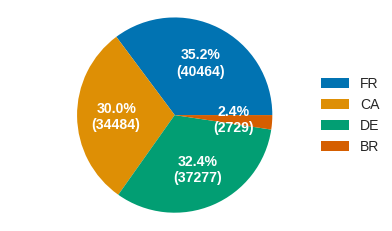

In [14]:
# values
labels = list(countries.keys())
values = [countries[label] for label in labels]
print(countries)

# autopct pie plot - function
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# plot
fig, ax = plt.subplots()
ax.pie(values, autopct=lambda pct: func(pct, values), colors=palette,
       textprops={'color':'w','fontsize':fontsize,'weight':'bold'})
lgd = ax.legend(labels, loc='center left', bbox_to_anchor=(0.9, 0, 0.5, 1), prop={'size':fontsize})
ax.axis('equal')
plt.savefig('%s/%s.pdf' % (plot_folder, 'countries'), dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
